In [26]:
import helpers as hlp
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np

In [27]:
exp_ids = ["HRT7", "ATMF", "OCEF"]
setup = "PAPA"
oce_t_files = [f"{setup}/{exp_id}/{exp_id}*_T.nc" for exp_id in exp_ids]
atm_prog_files = [f"{setup}/{exp_id}/progvar.nc" for exp_id in exp_ids]
atm_diag_files = [f"{setup}/{exp_id}/diagvar.nc" for exp_id in exp_ids]

In [ ]:
varname = "Temperature"
atm_temps = [hlp.load_cube(atm_prog_file, varname) for atm_prog_file in atm_prog_files]
varname = "Sea Surface temperature"
oce_ssts = [hlp.load_cube(oce_t_file, varname) for oce_t_file in oce_t_files]
varname = "Surface SW Radiation"
atm_ssws = [hlp.load_cube(atm_diag_file, varname) for atm_diag_file in atm_diag_files]
varname = "Shortwave Radiation"
oce_ssws = [hlp.load_cube(oce_t_file, varname) for oce_t_file in oce_t_files]

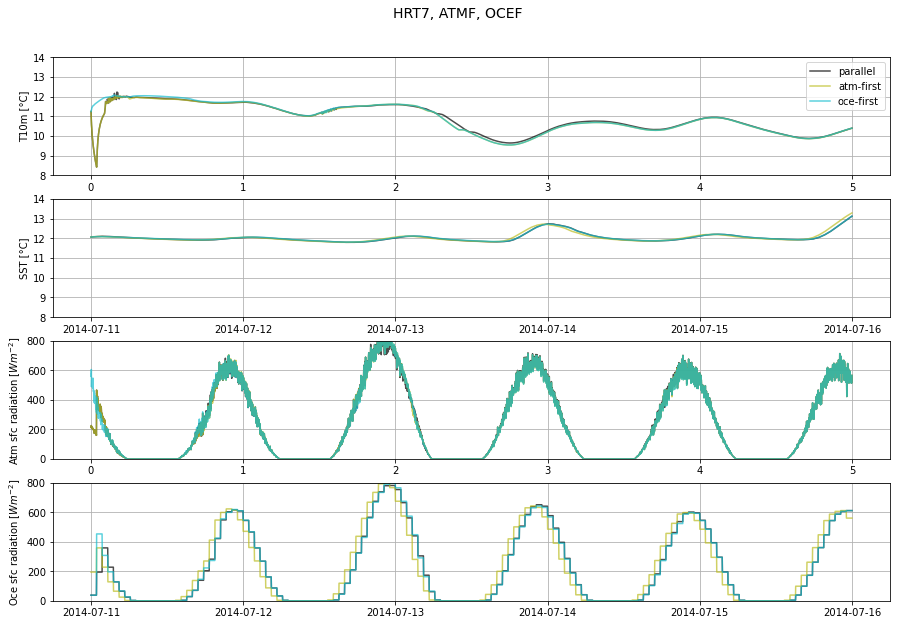

In [38]:
colors = ["k", "C8", "C9"]
labels = ["parallel", "atm-first", "oce-first"]
alpha = 0.7

fig, axs = plt.subplots(4, 1)
fig.set_size_inches(15, 10)
fig.suptitle(f"{exp_ids[0]}, {exp_ids[1]}, {exp_ids[2]}", y=0.95, size=14)

ax_atm_temp = axs[0]
assert len(colors) == len(atm_temps)
for i in range(len(colors)):
    atm_temp = atm_temps[i]
    color = colors[i]
    label = labels[i]
    atm_temp.convert_units("degC")
    time_coord = atm_temp.coord("time")
    time_coord.convert_units("d")
    qplt.plot(atm_temp[:, 59], axes=ax_atm_temp, color=color, label=label, alpha=alpha)
ax_atm_temp.set_ybound(8, 14)
ax_atm_temp.set_ylabel("T10m [°C]")
ax_atm_temp.set_yticks(list(range(8, 15)))
ax_atm_temp.set_xlabel("")
ax_atm_temp.grid()
ax_atm_temp.set_title("")
ax_atm_temp.legend()

ax_oce_sst = axs[1]
assert len(colors) == len(oce_ssts)
for i in range(len(colors)):
    oce_sst = oce_ssts[i]
    color = colors[i]
    label = labels[i]
    qplt.plot(oce_sst[:, 1, 1], axes=ax_oce_sst, color=color, label=label, alpha=alpha)
ax_oce_sst.set_ybound(8, 14)
ax_oce_sst.set_ylabel("SST [°C]")
ax_oce_sst.set_yticks(list(range(8, 15)))
ax_oce_sst.set_xlabel("")
ax_oce_sst.grid()
ax_oce_sst.set_title("")

ax_atm_ssw = axs[2]

assert len(colors) == len(atm_ssws)
for i in range(len(colors)):
    atm_ssw = atm_ssws[i]
    color = colors[i]
    label = labels[i]
    time_coord = atm_ssw.coord("time")
    time_coord.convert_units("d")
    qplt.plot(atm_ssw[:], axes=ax_atm_ssw, color=color, label=label, alpha=alpha)
ax_atm_ssw.set_title("")
ax_atm_ssw.set_xlabel("")
ax_atm_ssw.set_ylabel(r"Atm sfc radiation [$W m^{-2}$]")
ax_atm_ssw.set_ybound(0, 800)
ax_atm_ssw.grid()

ax_oce_ssw = axs[3]

assert len(colors) == len(oce_ssws)
for i in range(len(colors)):
    oce_ssw = oce_ssws[i]
    color = colors[i]
    label = labels[i]
    qplt.plot(oce_ssw[:, 1, 1], axes=ax_oce_ssw, color=color, label=label, alpha=alpha)
ax_oce_ssw.set_title("")
ax_oce_ssw.set_xlabel("")
ax_oce_ssw.set_ylabel(r"Oce sfc radiation [$W m^{-2}$]")
ax_oce_ssw.set_ybound(0, 800)
ax_oce_ssw.grid()


# fig.savefig(f"plots/figure7_reproduction_{setup}_{exp_id}.pdf", bbox_inches="tight")